# Jarod Guign
## Research question/interests

Briefly describe your research question or interests here.

Does the release and continued popularity of triple A multiplayer fps titles effect the player numbers of CS:GO, or is its player base isolated from other video game communities?

## Milestone 3

#### Imports

In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from project_functions1 import load_process_csgo

### Analysis Pipeline

#### Load Data

In [3]:
chord1 = pd.read_csv('../data/raw/SteamCharts.csv', encoding='latin')
chord2 = pd.read_csv('../data/raw/Twitch_game_data.csv', encoding='latin')
chord3 = pd.read_csv('../data/raw/Twitch_global_data.csv', encoding='latin')
df_csgo = chord1[chord1['gamename'].str.startswith("Counter-Strike: Global Offensive")]
# df_csgo

#### Clean Data

In [85]:
df_csgo['gain'].fillna(0, inplace=True)
df_csgo = df_csgo.drop(['peak', 'avg_peak_perc', 'gamename'], axis = 1)
# df_csgo.pop()
# df_csgo.pop()
# df_csgo

#### Process Data & Wrangled

In [86]:
df_csgo = df_csgo.convert_dtypes()
df_csgo = df_csgo.assign(day= '1')
df_csgo = df_csgo.assign(date= pd.to_datetime(df_csgo['year'].astype(str)  + df_csgo['month'] + df_csgo['day'], format='%Y%B%d'))
df_csgo

,year,month,avg,gain,day,date
0,2021,February,741013.24,-2196.42,1,2021-02-01
1,2021,January,743209.66,25405.91,1,2021-01-01
2,2020,December,717803.75,49049.17,1,2020-12-01
3,2020,November,668754.58,55087.89,1,2020-11-01
4,2020,October,613666.69,6816.37,1,2020-10-01
...,...,...,...,...,...,...
99,2012,November,14134.1,3394.62,1,2012-11-01
100,2012,October,10739.48,-5261.27,1,2012-10-01
101,2012,September,16000.75,525.36,1,2012-09-01
102,2012,August,15475.39,14542.81,1,2012-08-01


In [9]:
df_csgo.pop('year')
df_csgo.pop('month')
df_csgo.pop('day')
df = df_csgo.pop('datetime')
df_csgo.insert(0, 'date', df)
df_csgo_sorted = df_csgo.sort_values('date')
df_csgo_sorted

,date,avg,gain
103,2012-07-01,932.57,0.0
102,2012-08-01,15475.39,14542.81
101,2012-09-01,16000.75,525.36
100,2012-10-01,10739.48,-5261.27
99,2012-11-01,14134.1,3394.62
...,...,...,...
4,2020-10-01,613666.69,6816.37
3,2020-11-01,668754.58,55087.89
2,2020-12-01,717803.75,49049.17
1,2021-01-01,743209.66,25405.91


In [10]:
df_csgo_sorted['rolling_gain'] = df_csgo_sorted['gain'].rolling(7, center=True).mean()
df_csgo_sorted

,date,avg,gain,rolling_gain
103,2012-07-01,932.57,0.0,NaN
102,2012-08-01,15475.39,14542.81,NaN
101,2012-09-01,16000.75,525.36,NaN
100,2012-10-01,10739.48,-5261.27,2175.948571
99,2012-11-01,14134.1,3394.62,2348.592857
...,...,...,...,...
4,2020-10-01,613666.69,6816.37,10223.171429
3,2020-11-01,668754.58,55087.89,16444.632857
2,2020-12-01,717803.75,49049.17,NaN
1,2021-01-01,743209.66,25405.91,NaN


In [11]:
df_csgo_sorted.fillna(0, inplace=True)
df_csgo_sorted

,date,avg,gain,rolling_gain
103,2012-07-01,932.57,0.0,0.000000
102,2012-08-01,15475.39,14542.81,0.000000
101,2012-09-01,16000.75,525.36,0.000000
100,2012-10-01,10739.48,-5261.27,2175.948571
99,2012-11-01,14134.1,3394.62,2348.592857
...,...,...,...,...
4,2020-10-01,613666.69,6816.37,10223.171429
3,2020-11-01,668754.58,55087.89,16444.632857
2,2020-12-01,717803.75,49049.17,0.000000
1,2021-01-01,743209.66,25405.91,0.000000


### Method Chaining

In [4]:
print(load_process_csgo('../data/raw/SteamCharts.csv'))

         date        avg      gain  rolling_gain
99 2012-11-01    14134.1   3394.62   2348.592857
98 2012-12-01   14079.39    -54.71     69.214286
97 2013-01-01   16164.22   2084.83      0.750000
96 2013-02-01   17372.73   1208.51   1138.694286
95 2013-03-01   15959.89  -1412.84    569.391429
..        ...        ...       ...           ...
7  2020-07-01  625900.81 -45746.65  -8195.227143
6  2020-08-01  639957.66  14056.85 -26978.520000
5  2020-09-01  606850.32 -33107.34  -7284.500000
4  2020-10-01  613666.69   6816.37  10223.171429
3  2020-11-01  668754.58  55087.89  16444.632857

[97 rows x 4 columns]


In [5]:
df_csgo_sorted = load_process_csgo('../data/raw/SteamCharts.csv')
df_csgo_sorted

,date,avg,gain,rolling_gain
99,2012-11-01,14134.1,3394.62,2348.592857
98,2012-12-01,14079.39,-54.71,69.214286
97,2013-01-01,16164.22,2084.83,0.750000
96,2013-02-01,17372.73,1208.51,1138.694286
95,2013-03-01,15959.89,-1412.84,569.391429
...,...,...,...,...
7,2020-07-01,625900.81,-45746.65,-8195.227143
6,2020-08-01,639957.66,14056.85,-26978.520000
5,2020-09-01,606850.32,-33107.34,-7284.500000
4,2020-10-01,613666.69,6816.37,10223.171429


### Exploritory Data Analysis

#### Understanding your Variables

In [6]:
chord1.head()

,gamename,year,month,avg,gain,peak,avg_peak_perc
0,Counter-Strike: Global Offensive,2021,February,741013.24,-2196.42,1123485,65.9567%
1,Counter-Strike: Global Offensive,2021,January,743209.66,25405.91,1124553,66.0893%
2,Counter-Strike: Global Offensive,2020,December,717803.75,49049.17,1164396,61.646%
3,Counter-Strike: Global Offensive,2020,November,668754.58,55087.89,1037464,64.4605%
4,Counter-Strike: Global Offensive,2020,October,613666.69,6816.37,943876,65.0156%


In [7]:
df_csgo_sorted

,date,avg,gain,rolling_gain
99,2012-11-01,14134.1,3394.62,2348.592857
98,2012-12-01,14079.39,-54.71,69.214286
97,2013-01-01,16164.22,2084.83,0.750000
96,2013-02-01,17372.73,1208.51,1138.694286
95,2013-03-01,15959.89,-1412.84,569.391429
...,...,...,...,...
7,2020-07-01,625900.81,-45746.65,-8195.227143
6,2020-08-01,639957.66,14056.85,-26978.520000
5,2020-09-01,606850.32,-33107.34,-7284.500000
4,2020-10-01,613666.69,6816.37,10223.171429


In [8]:
print(df_csgo_sorted.shape)
print(chord1.shape)

(97, 4)
(83789, 7)


In [9]:
print(df_csgo_sorted.dtypes)

date            datetime64[ns]
avg                    Float64
gain                   Float64
rolling_gain           float64
dtype: object


In [10]:
df_csgo_sorted.columns

Index(['date', 'avg', 'gain', 'rolling_gain'], dtype='object')

In [11]:
print(df_csgo_sorted.nunique(axis=0))

date            97
avg             97
gain            97
rolling_gain    97
dtype: int64


In [12]:
print(chord1.nunique(axis=0))

gamename          1260
year                10
month               12
avg              53471
gain             37276
peak             12748
avg_peak_perc    71491
dtype: int64


In [13]:
df_csgo_sorted.describe()

,avg,gain,rolling_gain
count,97.000000,97.000000,97.000000
mean,307772.045361,6783.660928,6839.072253
std,185140.928333,34588.859331,13088.399249
min,14079.390000,-97147.790000,-26978.520000
25%,147329.070000,-3631.080000,0.750000
50%,342195.700000,4164.010000,5536.125714
75%,386908.720000,17085.500000,13183.467143
max,857604.220000,186570.940000,63811.232857


In [14]:
chord1.describe()

,year,avg,gain,peak
count,83789.000000,8.378900e+04,82529.000000,8.378900e+04
mean,2017.338708,2.792017e+03,-10.245559,5.518877e+03
std,2.237587,2.648480e+04,3789.944005,5.015571e+04
min,2012.000000,0.000000e+00,-250248.990000,0.000000e+00
25%,2016.000000,5.325000e+01,-38.310000,1.380000e+02
50%,2018.000000,2.042700e+02,-1.630000,5.020000e+02
75%,2019.000000,7.716500e+02,22.320000,1.741000e+03
max,2021.000000,1.584887e+06,426446.120000,3.236027e+06


In [16]:
print(df_csgo_sorted.date.unique())

['2012-11-01T00:00:00.000000000' '2012-12-01T00:00:00.000000000'
 '2013-01-01T00:00:00.000000000' '2013-02-01T00:00:00.000000000'
 '2013-03-01T00:00:00.000000000' '2013-04-01T00:00:00.000000000'
 '2013-05-01T00:00:00.000000000' '2013-06-01T00:00:00.000000000'
 '2013-07-01T00:00:00.000000000' '2013-08-01T00:00:00.000000000'
 '2013-09-01T00:00:00.000000000' '2013-10-01T00:00:00.000000000'
 '2013-11-01T00:00:00.000000000' '2013-12-01T00:00:00.000000000'
 '2014-01-01T00:00:00.000000000' '2014-02-01T00:00:00.000000000'
 '2014-03-01T00:00:00.000000000' '2014-04-01T00:00:00.000000000'
 '2014-05-01T00:00:00.000000000' '2014-06-01T00:00:00.000000000'
 '2014-07-01T00:00:00.000000000' '2014-08-01T00:00:00.000000000'
 '2014-09-01T00:00:00.000000000' '2014-10-01T00:00:00.000000000'
 '2014-11-01T00:00:00.000000000' '2014-12-01T00:00:00.000000000'
 '2015-01-01T00:00:00.000000000' '2015-02-01T00:00:00.000000000'
 '2015-03-01T00:00:00.000000000' '2015-04-01T00:00:00.000000000'
 '2015-05-01T00:00:00.000

#### Visualization

<AxesSubplot:>

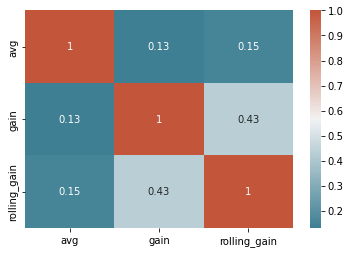

In [17]:
corr = df_csgo_sorted.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:xlabel='date', ylabel='rolling_gain'>

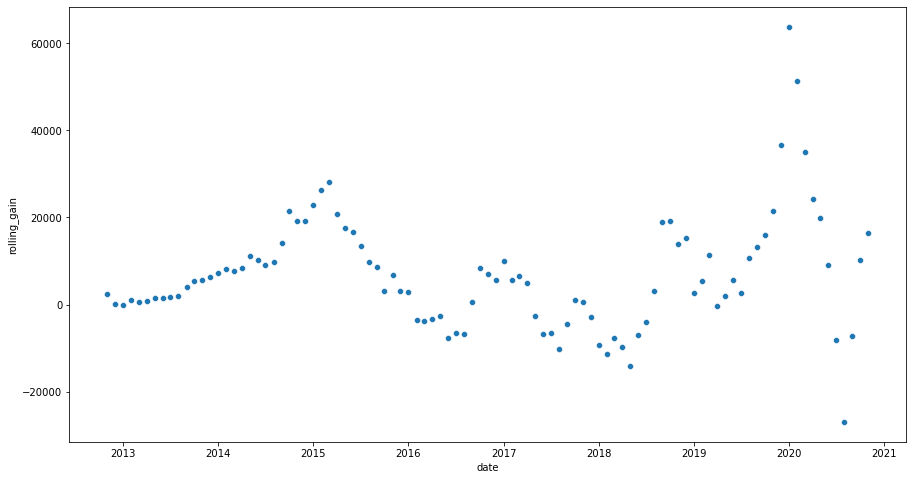

In [18]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.scatterplot(x = 'date', y='rolling_gain', data = df_csgo_sorted)

<AxesSubplot:xlabel='date', ylabel='gain'>

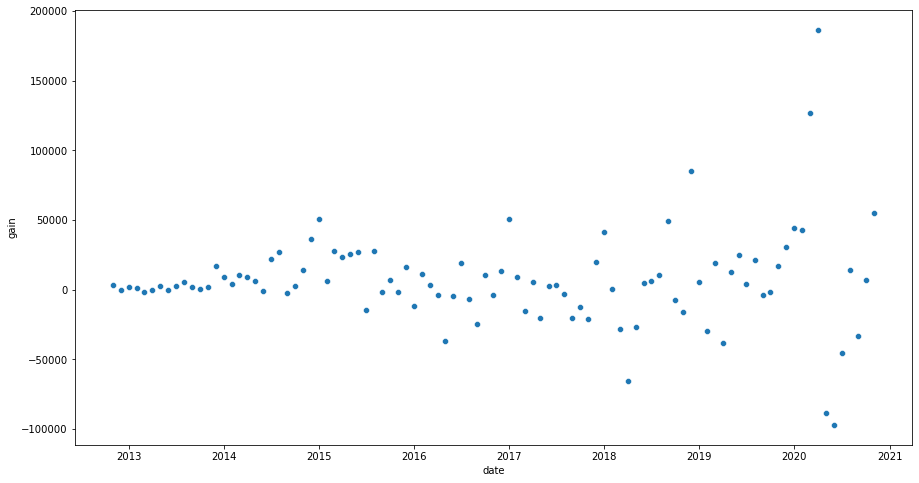

In [19]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.scatterplot(x = 'date', y='gain', data = df_csgo_sorted)

<AxesSubplot:xlabel='date', ylabel='avg'>

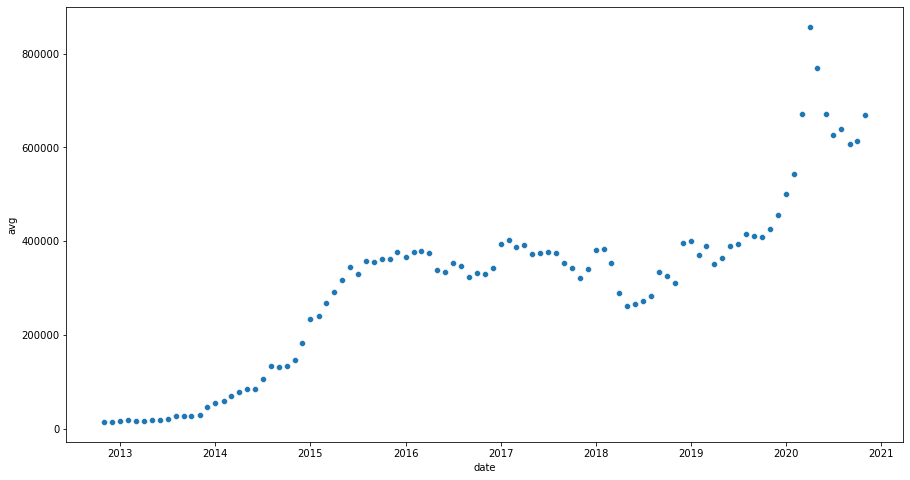

In [20]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.scatterplot(x = 'date', y = 'avg', data = df_csgo_sorted)

<Figure size 4320x4320 with 0 Axes>

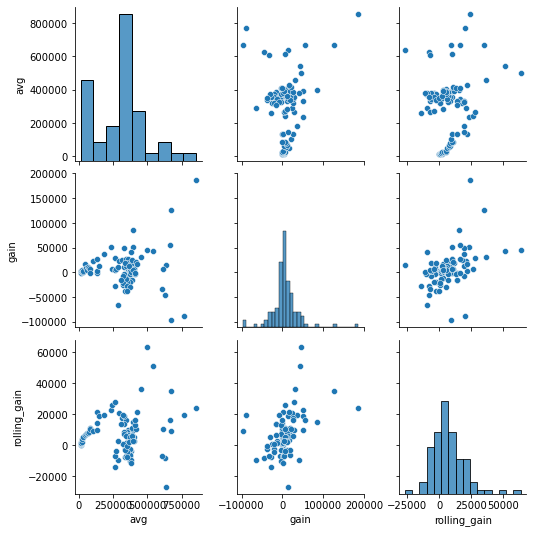

In [21]:
fig = plt.gcf()
fig.set_size_inches(60, 60)
sns.pairplot(df_csgo_sorted)

<AxesSubplot:ylabel='Frequency'>

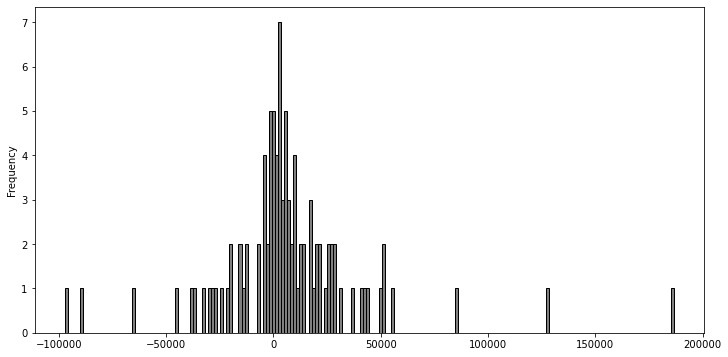

In [22]:
df_csgo_sorted['gain'].plot(kind='hist', bins=200, figsize=(12, 6), facecolor='grey', edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

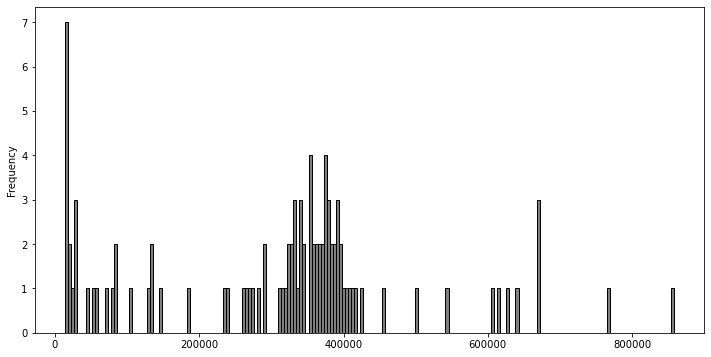

In [23]:
df_csgo_sorted['avg'].plot(kind='hist', bins=200, figsize=(12, 6), facecolor='grey', edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

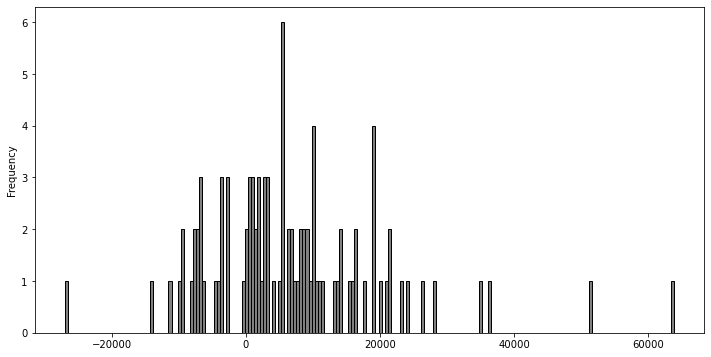

In [24]:
df_csgo_sorted['rolling_gain'].plot(kind='hist', bins=200, figsize=(12, 6), facecolor='grey', edgecolor='black')

<AxesSubplot:>

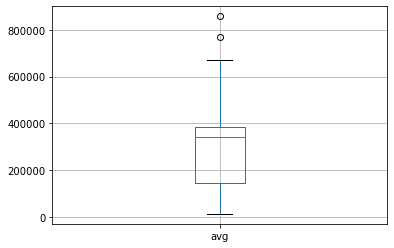

In [25]:
df_csgo_sorted.boxplot('avg')

<AxesSubplot:>

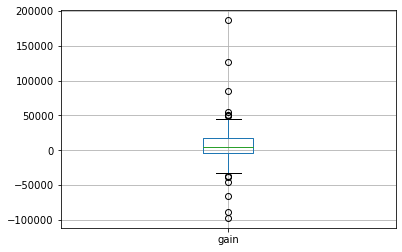

In [26]:
df_csgo_sorted.boxplot('gain')